# Merging the captions and modality values
Where we obtain a CSV file with the *subfigure*, *modality* and *caption* values per row. 

In [59]:
import pandas as pd
import numpy as np

## Load dataframes
ImageClef16 provides a CSV file with the pairs image name and image type (class) for the subfigure classification task. For the captions, we borrow them from the compound figure detection task. The CSV file below is a post-processed file to match each caption to the image name used in the subfigure classification task.


In [48]:
captions_file = '../data/out/clef16_subfig_captions.csv'
classes_file  =  '/mnt/clef/imageclef_2016/SubfigureClassificationTraining2016-GT.csv'

captions_df = pd.read_csv(captions_file, names=['FIG_NAME', 'CAPTION'], header=0)
classes_df = pd.read_csv(classes_file, names=['FIG_NAME', 'CLASS'], header=None)

print("Captions frame shape: {0}".format(captions_df.shape))
print("Classes frame shape:  {0}".format(classes_df.shape))

Captions frame shape: (6776, 2)
Classes frame shape:  (6776, 2)


In [49]:
captions_df.head()

,FIG_NAME,CAPTION
0,1471-2105-12-247-9-3,Illustration of the functional role of three w...
1,1423-0127-16-109-3-1,A. Three dimensional model of class C protein ...
2,1471-2105-12-247-9-2,Illustration of the functional role of three w...
3,1423-0127-16-109-3-2,A. Three dimensional model of class C protein ...
4,1471-2105-6-6-1-3,Analysis of plant CNB domains . (A) Arabidopsi...


In [50]:
classes_df.head()

,FIG_NAME,CLASS
0,11373_2007_9226_Fig1_HTML-10,DMFL
1,11373_2007_9226_Fig1_HTML-11,DMFL
2,11373_2007_9226_Fig1_HTML-12,DMFL
3,11373_2007_9226_Fig1_HTML-13,DMFL
4,11373_2007_9226_Fig1_HTML-14,DMFL


Merging the dataframes shows that several subfigures share the same caption. This is a downside from the dataset as the captions are at the figure level and not at the subfigure level.

In [60]:
merged_df = pd.merge(classes_df, captions_df, on='FIG_NAME', how='left')
merged_df['ID'] = np.arange(len(df))
merged_df.head()

,FIG_NAME,CLASS,CAPTION,ID
0,11373_2007_9226_Fig1_HTML-10,DMFL,"Colocalization of hNopp140, pol I and rDNA rep...",0
1,11373_2007_9226_Fig1_HTML-11,DMFL,"Colocalization of hNopp140, pol I and rDNA rep...",1
2,11373_2007_9226_Fig1_HTML-12,DMFL,"Colocalization of hNopp140, pol I and rDNA rep...",2
3,11373_2007_9226_Fig1_HTML-13,DMFL,"Colocalization of hNopp140, pol I and rDNA rep...",3
4,11373_2007_9226_Fig1_HTML-14,DMFL,"Colocalization of hNopp140, pol I and rDNA rep...",4


In [61]:
output_file = '../data/out/clef16_caption_classes.csv'
merged_df.to_csv(output_file, index=False)

## Sentence Length

In [10]:
import re
def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . \n'
    becomes
    "the rock is destined to be the 21st century 's new conan and that he 's going to make a splash even greater than arnold schwarzenegger , jean claud van damme or steven segal"
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [11]:
merged_df['CLEAN'] = merged_df['CAPTION'].apply(clean_str)

In [12]:
merged_df.head()

,FIG_NAME,CLASS,CAPTION,CLEAN
0,11373_2007_9226_Fig1_HTML-10,DMFL,"Colocalization of hNopp140, pol I and rDNA rep...","colocalization of hnopp140 , pol i and rdna re..."
1,11373_2007_9226_Fig1_HTML-11,DMFL,"Colocalization of hNopp140, pol I and rDNA rep...","colocalization of hnopp140 , pol i and rdna re..."
2,11373_2007_9226_Fig1_HTML-12,DMFL,"Colocalization of hNopp140, pol I and rDNA rep...","colocalization of hnopp140 , pol i and rdna re..."
3,11373_2007_9226_Fig1_HTML-13,DMFL,"Colocalization of hNopp140, pol I and rDNA rep...","colocalization of hnopp140 , pol i and rdna re..."
4,11373_2007_9226_Fig1_HTML-14,DMFL,"Colocalization of hNopp140, pol I and rDNA rep...","colocalization of hnopp140 , pol i and rdna re..."


In [15]:
merged_df.iloc[0]['CAPTION']

'Colocalization of hNopp140, pol I and rDNA repeats. ( a ) Distribution of hNopp140 and pol I. The rounded-up mitotic cells were collected from HeLa culture by mechanical shake-off (upper panel; arrows for anaphase, arrowheads for telophase). The attached cells were at interphase (lower panel). Cells were subjected to double-fluorescent immunostaining of pol I and hNopp140. The DNA was counterstained with Hoechst 33258. ( b ) Distribution of hNopp140 and rDNA. HeLa cells at interphase were visualized in FISH experiments with a biotin labeled rDNA probe and a detector, avidin ï¿½ï¿½ rhodamin conjugate. The same cells were also immunofluorescence-stained with anti-hNopp140 mAb. Arrow, Cajal body. ( c ) rDNA colocalized with the ectopically expressed hNopp140. HeLa cells transfected with Flag-tagged full-length hNopp140 were processed for detecting the rDNA and the Flag-tagged proteins. Bars, 10 ï¿½ Î¼ m'

In [16]:
merged_df.iloc[0]['CLEAN']

'colocalization of hnopp140 , pol i and rdna repeats \\( a \\) distribution of hnopp140 and pol i the rounded up mitotic cells were collected from hela culture by mechanical shake off \\( upper panel arrows for anaphase , arrowheads for telophase \\) the attached cells were at interphase \\( lower panel \\) cells were subjected to double fluorescent immunostaining of pol i and hnopp140 the dna was counterstained with hoechst 33258 \\( b \\) distribution of hnopp140 and rdna hela cells at interphase were visualized in fish experiments with a biotin labeled rdna probe and a detector , avidin rhodamin conjugate the same cells were also immunofluorescence stained with anti hnopp140 mab arrow , cajal body \\( c \\) rdna colocalized with the ectopically expressed hnopp140 hela cells transfected with flag tagged full length hnopp140 were processed for detecting the rdna and the flag tagged proteins bars , 10 m'

In [25]:
merged_df['LEN'] = merged_df['CLEAN'].apply(lambda x: len(str(x).split(' ')))

In [26]:
print("mean length of sentence: " + str(merged_df['LEN'].mean()))
print("max length of sentence: " + str(merged_df['LEN'].max()))
print("std dev length of sentence: " + str(merged_df['LEN'].std()))

mean length of sentence: 146.19332939787486
max length of sentence: 592
std dev length of sentence: 93.57052453113403


<AxesSubplot:>

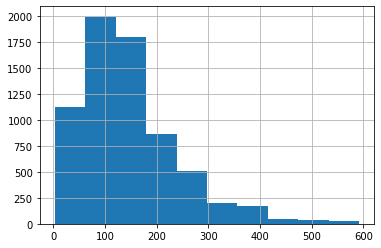

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

merged_df['LEN'].hist()

## Check tokenizer

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
max_words = 20000
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n\'')

In [35]:
x = merged_df['CLEAN'].tolist()

In [36]:
len(x)

6776

In [37]:
tokenizer.fit_on_texts(x)

In [38]:
word_index = tokenizer.word_index

In [39]:
len(word_index)

14805

In [41]:
train_sequences = tokenizer.texts_to_sequences(x)

In [43]:
x[0]

'colocalization of hnopp140 , pol i and rdna repeats \\( a \\) distribution of hnopp140 and pol i the rounded up mitotic cells were collected from hela culture by mechanical shake off \\( upper panel arrows for anaphase , arrowheads for telophase \\) the attached cells were at interphase \\( lower panel \\) cells were subjected to double fluorescent immunostaining of pol i and hnopp140 the dna was counterstained with hoechst 33258 \\( b \\) distribution of hnopp140 and rdna hela cells at interphase were visualized in fish experiments with a biotin labeled rdna probe and a detector , avidin rhodamin conjugate the same cells were also immunofluorescence stained with anti hnopp140 mab arrow , cajal body \\( c \\) rdna colocalized with the ectopically expressed hnopp140 hela cells transfected with flag tagged full length hnopp140 were processed for detecting the rdna and the flag tagged proteins bars , 10 m'

In [44]:
word_index['pol']

1244

In [45]:
train_data = pad_sequences(train_sequences,
                               maxlen=200,
                               padding='pre')

In [46]:
train_data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, 1142,    2,
        832, 1244,   51,    3,  723, 2105,    5,  146,    2,  832,    3,
       1244,   51,    1, 2770,  338, 1153,   11,   12,  590,   18,  597,
        358,   14, 3331, 4448, 1000,  316,   48,   69,    7, 4449,  197,
          7, 3672,    1, 2178,   11,   12,   23, 2230,  222,   48,   11,
         12,  785,    8,  457,  632, 1514,    2, 1244,   51,    3,  832,
          1,  129,   20, 1432,    6, 2936, 4450,    9,  146,    2,  832,
          3,  723,  597,   11,   23, 2230,   12,  636,    4, 1287,  119,
          6,    5, 1371,  140,  723,  202,    3,   

In [93]:
set_keys=[0,50,100]
dataframe = merged_df[merged_df['ID'].isin(set_keys)]
dataframe = dataframe.reset_index()

In [94]:
dataframe.head()

,index,FIG_NAME,CLASS,CAPTION,ID
0,0,11373_2007_9226_Fig1_HTML-10,DMFL,"Colocalization of hNopp140, pol I and rDNA rep...",0
1,50,1423-0127-17-22-2-1,GGEL,MBP-pulldown and mammalian two hybrid assay in...,50
2,100,1465-9921-11-121-3-3,GFIG,Intra-individual comparisons of relative gene ...,100


In [71]:
captions = dataframe['CAPTION'].tolist()
caption_seqs = tokenizer.texts_to_sequences(captions)
caption_seqs_padded = pad_sequences(train_sequences, maxlen=200, padding='pre')

In [72]:
captions

['Colocalization of hNopp140, pol I and rDNA repeats. ( a ) Distribution of hNopp140 and pol I. The rounded-up mitotic cells were collected from HeLa culture by mechanical shake-off (upper panel; arrows for anaphase, arrowheads for telophase). The attached cells were at interphase (lower panel). Cells were subjected to double-fluorescent immunostaining of pol I and hNopp140. The DNA was counterstained with Hoechst 33258. ( b ) Distribution of hNopp140 and rDNA. HeLa cells at interphase were visualized in FISH experiments with a biotin labeled rDNA probe and a detector, avidin ï¿½ï¿½ rhodamin conjugate. The same cells were also immunofluorescence-stained with anti-hNopp140 mAb. Arrow, Cajal body. ( c ) rDNA colocalized with the ectopically expressed hNopp140. HeLa cells transfected with Flag-tagged full-length hNopp140 were processed for detecting the rDNA and the Flag-tagged proteins. Bars, 10 ï¿½ Î¼ m',
 'MBP-pulldown and mammalian two hybrid assay indicated homo-interaction character

In [98]:
idx = dataframe[dataframe['ID'] == 100].index[0]
idx

2

In [99]:
captions[idx]

'Intra-individual comparisons of relative gene expression of the M2 markers IL-10 (a, b) and CCR2 (c, d) in total BAL cells cultured in medium (four or 24 h), or stimulated with LPS (24 h), in sarcoidosis patients (left columns) and healthy controls (right columns) .,'